## Net friends these were studying together at same period
#### Used university_mates.csv

In [1]:
import csv
import networkx as nx
import collections
import re

#G = nx.Graph()
G = nx.DiGraph() 

In [2]:
#list persones

# used data > university_mates.csv
listUniversity = list()

with open('university_mates.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        #use all university 
        if True and  row['university_eng'] != '': #if re.match(r"Moscow State Law University", row['university_eng']) or re.match(r"Ural State Law Academy", row['university_eng']):
            #print(row['university_eng'],row['grad_year'])
            listUniversity.append(row['university_eng'])
            G.add_node(row['id'],
                       type = 'prosecutor',
                       name_eng = row['name_eng'],
                       office_eng= row['office_eng'],
                       date_of_appointment = row['date_of_appointment'],
                       gender = row['gender'],
                       age = row['age'],
                       birth_place_region_eng = row['birth_place_region_eng'],
                       birth_place_location_eng = row['birth_place_location_eng'],
                       
                       # university
                       university_eng = row['university_eng'],
                       grad_year = row['grad_year'],
                       ed_level_eng = row['ed_level_eng'],
                       # ========
                       
                       staff_income = row['staff_income'],
                       spouse_income  = row['spouse_income'],
                       image = row['image'])
listUniversity = list(set(listUniversity))

In [3]:
#add Universities nodes
# add special id for Universities
id = 1000
dictUniversity = dict()

for ed in listUniversity:
    dictUniversity[str(id)] = ed
    G.add_node(str(id), name_University = ed, type='education')
    id +=1

In [4]:
def find_id_node(dictOfWords,SearchStr):
    listOfKeys = [key  for (key, value) in dictOfWords.items() if value == SearchStr]
    return listOfKeys[0]

#### Find friends these were studying together

In [5]:
#determinate range and find connections

for univer in listUniversity: 
    
    # list of ranges in one University
    listRanges = list() 
    for node in G.nodes.data():
        if int(node[0]) < 1000 and node[1]['grad_year'] == '' and node[1]['university_eng'] == univer:
            #add edges with university for person without grad_year
            G.add_edge(node[0],find_id_node(dictUniversity,univer))
        
        elif int(node[0]) < 1000 and node[1]['grad_year'] != '' and node[1]['university_eng'] == univer:
            #add edges with university
            G.add_edge(node[0],find_id_node(dictUniversity,univer))
            
            grad_year = int(node[1]['grad_year'])
            #print(node[0],grad_year,(grad_year-8),grad_year+3)
            # adjust range years
            listRanges.append(((grad_year-7),grad_year+2))
    listRanges = list(set(listRanges))
    
    # find connections with range
    
    # add number of list frends to name of atribute
    #numberAtribute = 0
    for r in listRanges:
        listFrends = list()
        for node in G.nodes.data():
            if int(node[0]) < 1000 and node[1]['grad_year'] != '' and node[1]['university_eng'] == univer:
                if int(node[1]['grad_year']) in range(r[0],r[1]):
                    listFrends.append(node[0])
                    
                    print(node[0],node[1]['name_eng'],node[1]['grad_year'],r)
                    #print(listFrends)
        
    #add edges for groupfrends
    
        for frend1 in listFrends:
            nameUniver = univer.split(' ')
            nameAtr = nameUniver[0]+"_"+ str(r[0]) +"_"+ str(r[1]) #str(numberAtribute)+'Group_frends'
            G.nodes[frend1][nameAtr] = nameUniver[0]+"_"+ str(r[0]) +"_"+ str(r[1])
            for frend2 in listFrends:
                
                G.add_edge(frend1,frend2)
        #numberAtribute +=1 
        print(listFrends)
        
        print("\n")


24 Khlopushin Sergey Nikolaevich 1983 (1983, 1992)
59 Polouektov Ivan Vasilievich 1983 (1983, 1992)
63 Belov Sergey Dmitrievich 1986 (1983, 1992)
113 Ponomarev Yury Alexandrovich 1986 (1983, 1992)
89 Sharpuddi Muaydovich Abdul Kadyrov 1990 (1983, 1992)
181 Babaev Igor Alexandrovich 1991 (1983, 1992)
['24', '59', '63', '113', '89', '181']


89 Sharpuddi Muaydovich Abdul Kadyrov 1990 (1987, 1996)
181 Babaev Igor Alexandrovich 1991 (1987, 1996)
23 Khabarov Nikolai Alexeevich 1994 (1987, 1996)
101 Zakharov Alexei Yurievich 1995 (1987, 1996)
['89', '181', '23', '101']


60 Kantserova Natalia Evgenievna 1979 (1972, 1981)
['60']


63 Belov Sergey Dmitrievich 1986 (1984, 1993)
113 Ponomarev Yury Alexandrovich 1986 (1984, 1993)
89 Sharpuddi Muaydovich Abdul Kadyrov 1990 (1984, 1993)
181 Babaev Igor Alexandrovich 1991 (1984, 1993)
['63', '113', '89', '181']


89 Sharpuddi Muaydovich Abdul Kadyrov 1990 (1988, 1997)
181 Babaev Igor Alexandrovich 1991 (1988, 1997)
23 Khabarov Nikolai Alexeevich 199

99 Shishkin Nikola Anatolievich 1985 (1985, 1994)
79 Semenov Alexander Nikolaevich 1986 (1985, 1994)
10 Torgovchenkov Vladimir Ivanovich 1989 (1985, 1994)
13 Pantyushin Igor Stanislavovich 1991 (1985, 1994)
66 Panchenko Ivan Ivanovich 1992 (1985, 1994)
['65', '99', '79', '10', '13', '66']


90 Poslovsky Vasiliy Mitrofanovich 1984 (1978, 1987)
65 Baranov Yuri Alexeevich 1985 (1978, 1987)
99 Shishkin Nikola Anatolievich 1985 (1978, 1987)
79 Semenov Alexander Nikolaevich 1986 (1978, 1987)
['90', '65', '99', '79']


90 Poslovsky Vasiliy Mitrofanovich 1984 (1984, 1993)
65 Baranov Yuri Alexeevich 1985 (1984, 1993)
99 Shishkin Nikola Anatolievich 1985 (1984, 1993)
79 Semenov Alexander Nikolaevich 1986 (1984, 1993)
10 Torgovchenkov Vladimir Ivanovich 1989 (1984, 1993)
13 Pantyushin Igor Stanislavovich 1991 (1984, 1993)
66 Panchenko Ivan Ivanovich 1992 (1984, 1993)
['90', '65', '99', '79', '10', '13', '66']


90 Poslovsky Vasiliy Mitrofanovich 1984 (1979, 1988)
65 Baranov Yuri Alexeevich 1985 (

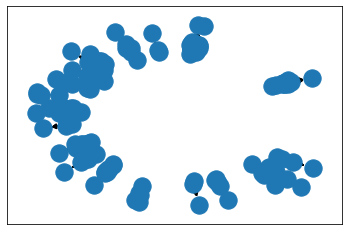

In [6]:
#check net
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=False)

In [7]:
#convert net for Gephi
nx.write_gexf(G, "02_Frends_Universities_sameRange.gexf")